In [2]:
library(zoo)
library(ggplot2)
library(dplyr)
library(forecast)
library(dynlm)
library(urca)
library(fUnitRoots)
library(ggfortify)
library(data.table)
library(tseries)
library(dplyr)
library(aTSA)
library(OECD)
library(lmtest)
library(readxl)
library(vars)

In [3]:
options(repr.plot.width = 20)
options(repr.plot.height = 6)

In [4]:
duom <-read.csv("duomenys.csv", header=T)

In [5]:
# su BVP

In [6]:
unts<- ts(duom$UN,start=c(1968,1),end=c(2018,4), frequency=4)

In [7]:
untsdiff <- diff(unts, d = 1)
untsdiff2 <- diff(unts, d = 1, lag = 4)

In [8]:
gdpts <- ts(duom$GDP, start=c(1968,2), end=c(2018,4), frequency = 4)

In [9]:
infts <- ts(duom$INF, start=c(1968,1),end=c(2018,4), frequency=4)

In [10]:
sdiff <- diff(infts,lag = 4)

In [11]:
df <- cbind(untsdiff, gdpts)

modelis skirtumams

In [12]:
train <- window(df, start =c(1968,2),end=c(2012,4))
test <-window(df, start=c(2013,1))

In [13]:
floor(12 * (nrow(train) / 100)^(1/4))

[1] 13

Parenkam VAR eilę

In [14]:
VARselect(train, lag.max = 13, type = "none")

,1,2,3,4,5,6,7,8,9,10,11,12,13
AIC(n),-1.5570354,-1.6285086,-1.7044803,-1.7174592,-1.739707,-1.726640,-1.7935613,-1.7660205,-1.7941272,-1.8420787,-1.8498816,-1.9033556,-1.9412099
HQ(n),-1.5265974,-1.5676326,-1.6131663,-1.5957072,-1.587518,-1.544012,-1.5804953,-1.5225166,-1.5201852,-1.5376988,-1.5150637,-1.5380997,-1.5455160
SC(n),-1.4820477,-1.4785333,-1.4795173,-1.4175085,-1.364769,-1.276714,-1.2686477,-1.1661193,-1.1192382,-1.0922021,-1.0250173,-1.0035037,-0.9663703
FPE(n),0.2107605,0.1962257,0.1818783,0.1795485,0.175623,0.177971,0.1665003,0.1712176,0.1665574,0.1588609,0.1577499,0.1496771,0.1442785


In [15]:
var.2c <- vars::VAR(train, p = 13, type = "none")
summary(var.2c)


VAR Estimation Results:
Endogenous variables: untsdiff, gdpts 
Deterministic variables: none 
Sample size: 166 
Log Likelihood: -257.967 
Roots of the characteristic polynomial:
0.9755 0.9588 0.9588 0.9436 0.9436 0.9401 0.9401 0.9326 0.9326 0.9293 0.9293 0.9039 0.9039 0.9028 0.9028 0.8766 0.8766 0.8752 0.8752 0.8663 0.8663 0.791 0.791 0.782 0.782 0.3385
Call:
vars::VAR(y = train, p = 13, type = "none")


Estimation results for equation untsdiff: 
untsdiff = untsdiff.l1 + gdpts.l1 + untsdiff.l2 + gdpts.l2 + untsdiff.l3 + gdpts.l3 + untsdiff.l4 + gdpts.l4 + untsdiff.l5 + gdpts.l5 + untsdiff.l6 + gdpts.l6 + untsdiff.l7 + gdpts.l7 + untsdiff.l8 + gdpts.l8 + untsdiff.l9 + gdpts.l9 + untsdiff.l10 + gdpts.l10 + untsdiff.l11 + gdpts.l11 + untsdiff.l12 + gdpts.l12 + untsdiff.l13 + gdpts.l13 

              Estimate Std. Error t value Pr(>|t|)    
untsdiff.l1  -0.238817   0.084071  -2.841 0.005174 ** 
gdpts.l1     -0.024433   0.025815  -0.946 0.345538    
untsdiff.l2   0.100670   0.087867   1.1

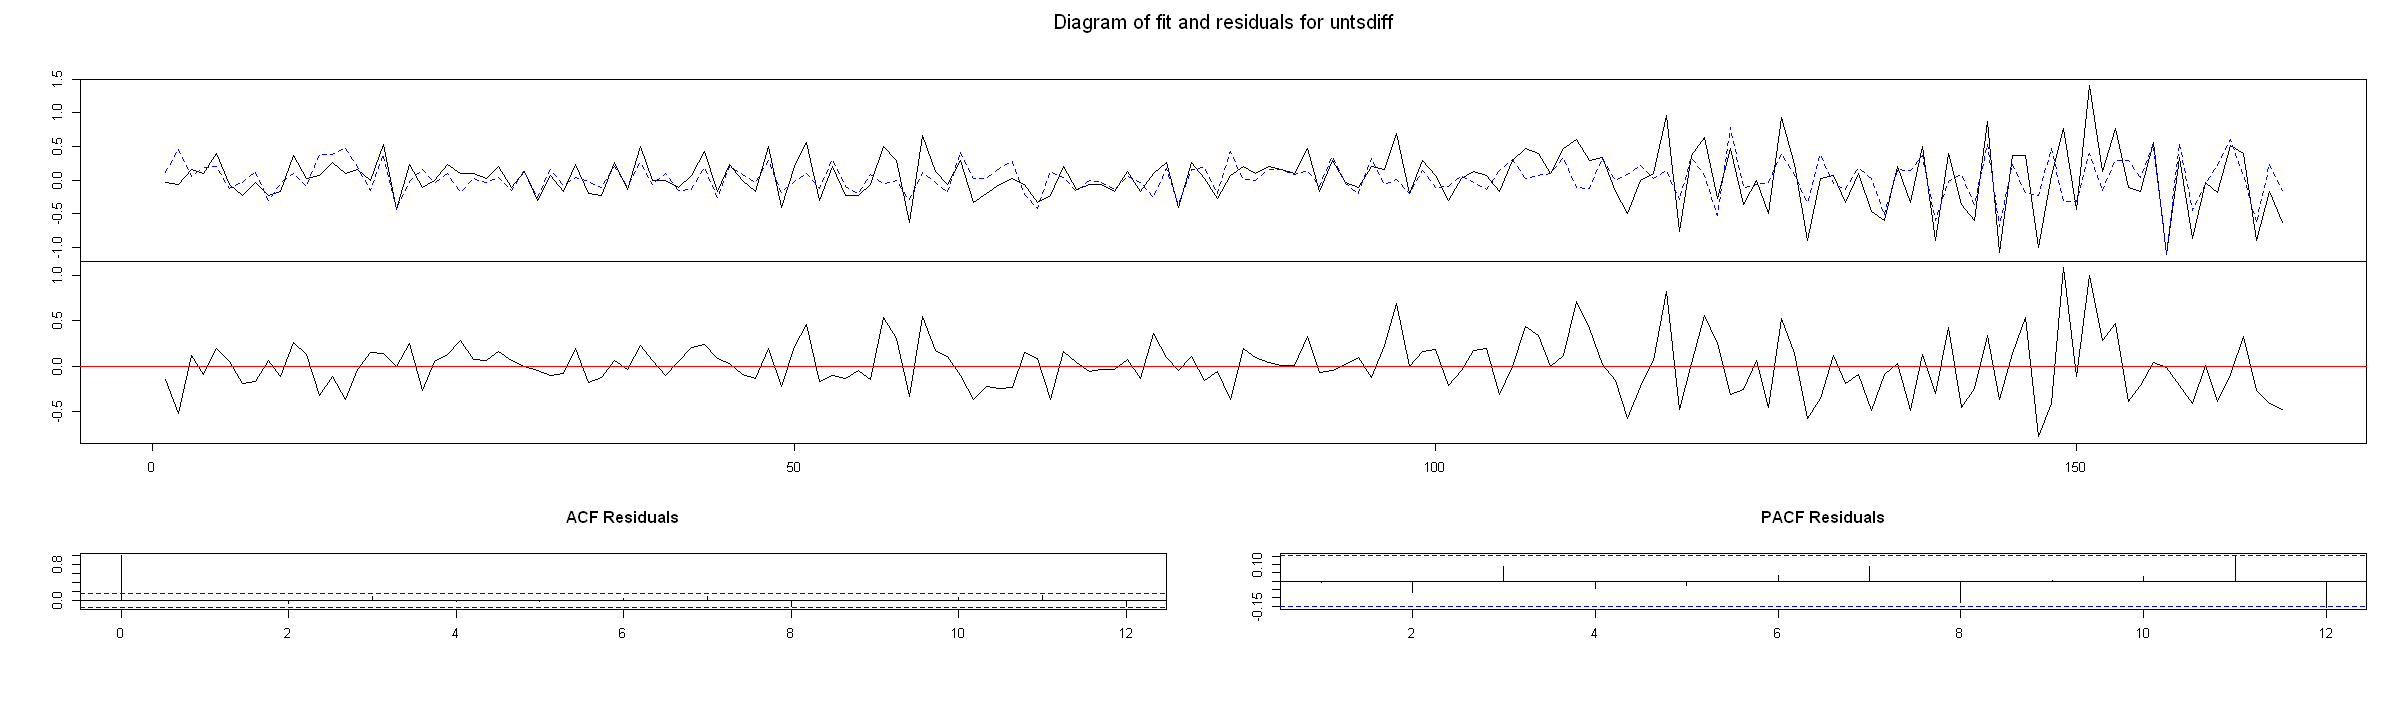

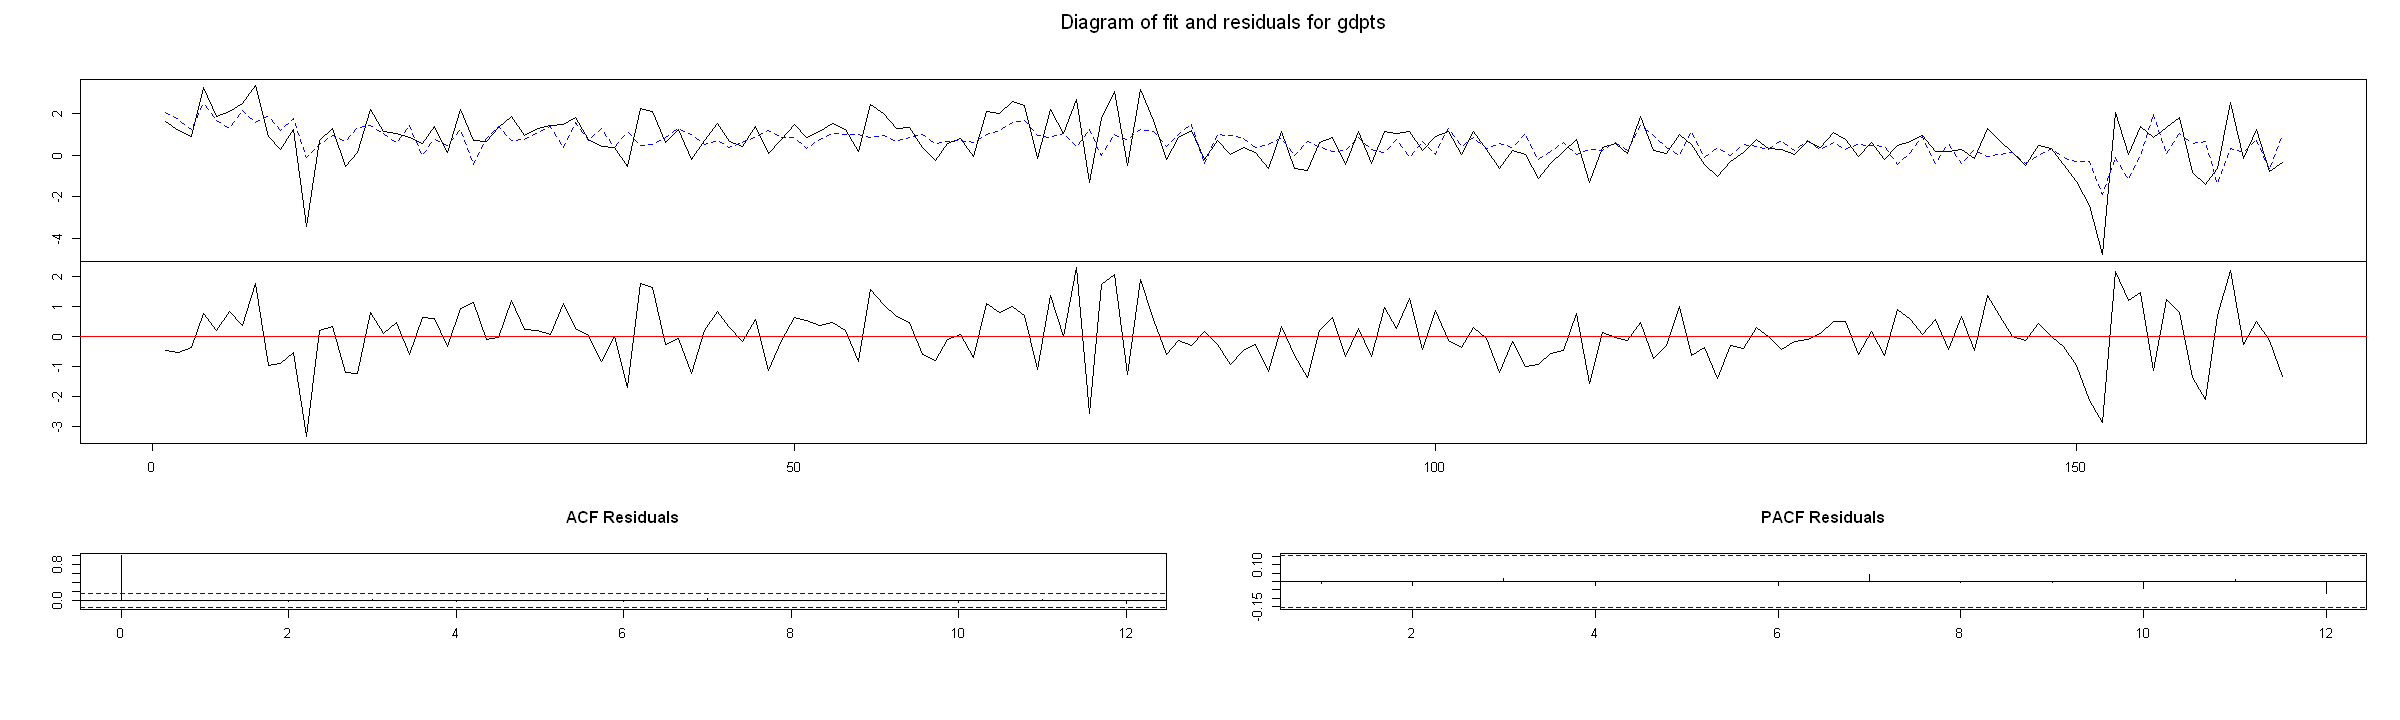

In [16]:
plot(var.2c)

In [18]:
serial.test(var.2c, type="BG")


	Breusch-Godfrey LM test

data:  Residuals of VAR object var.2c
Chi-squared = 26.625, df = 20, p-value = 0.1462

$serial

	Breusch-Godfrey LM test

data:  Residuals of VAR object var.2c
Chi-squared = 26.625, df = 20, p-value = 0.1462



In [19]:
mean(residuals(var.2c))

[1] 0.01358949

In [20]:
var.2c %>% forecast::forecast(h=nrow(test)) -> fc3

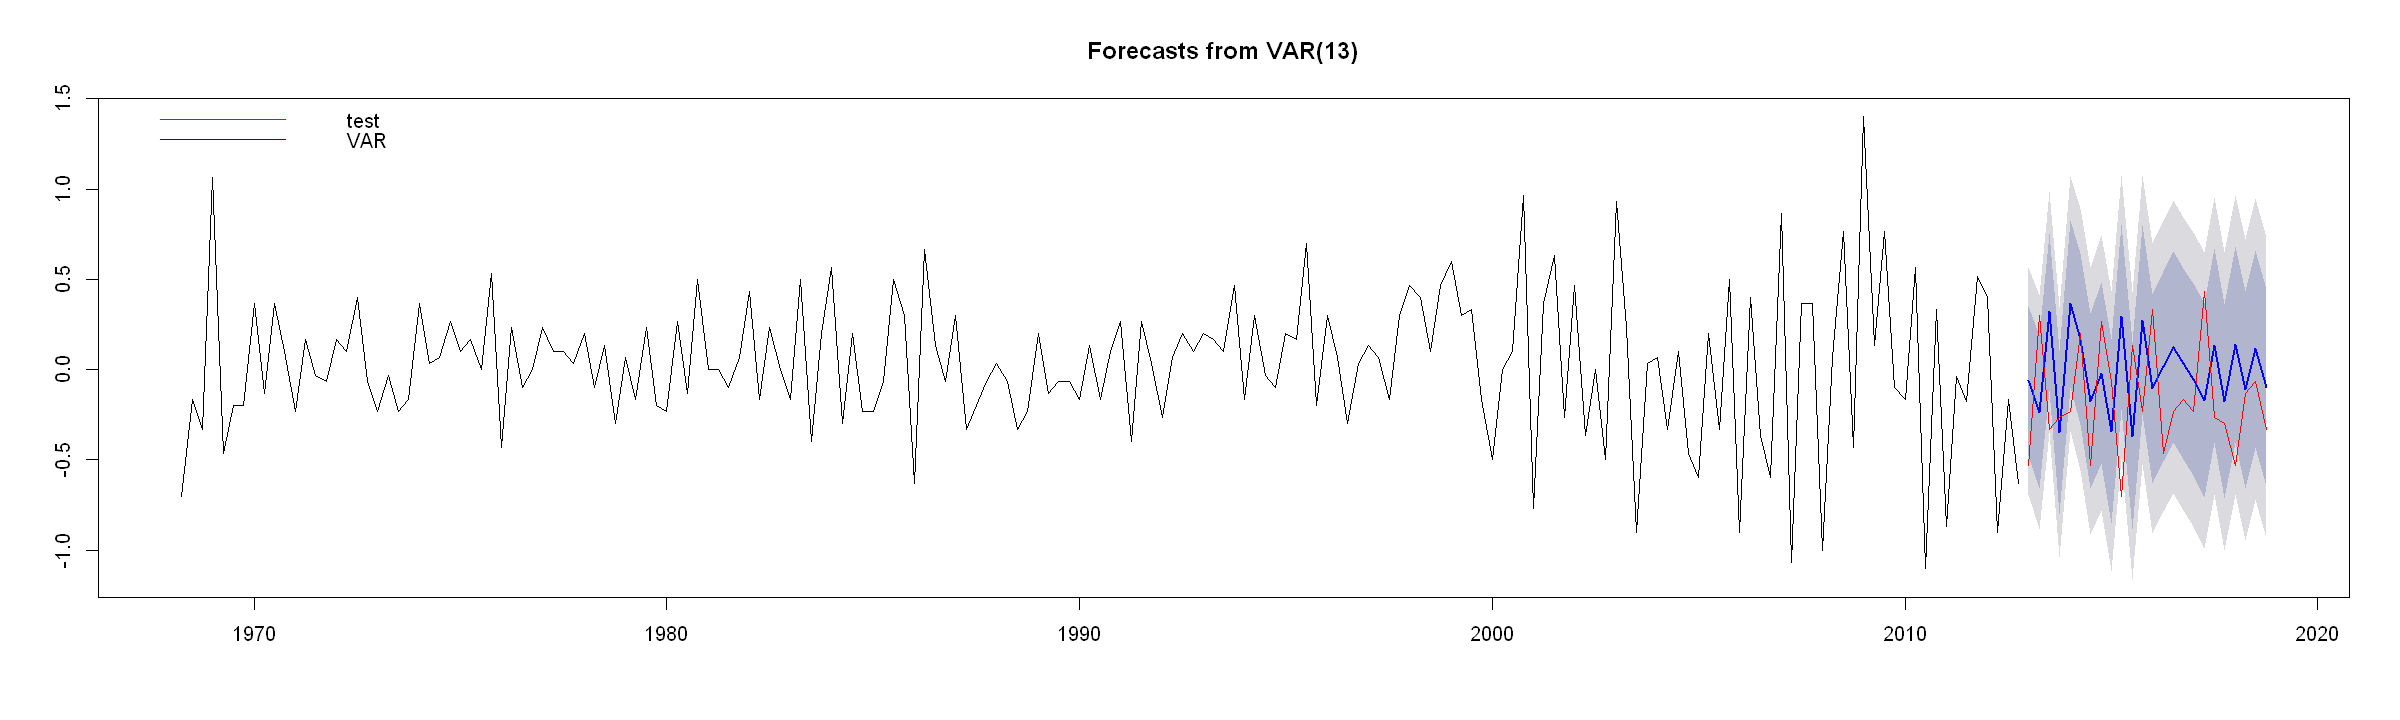

In [21]:
plot(fc3$forecast$untsdiff)
lines(test[,1], col="red" )
legend("topleft",lty=1,bty = "n",col=c("red","blue"),c("test","VAR")) 

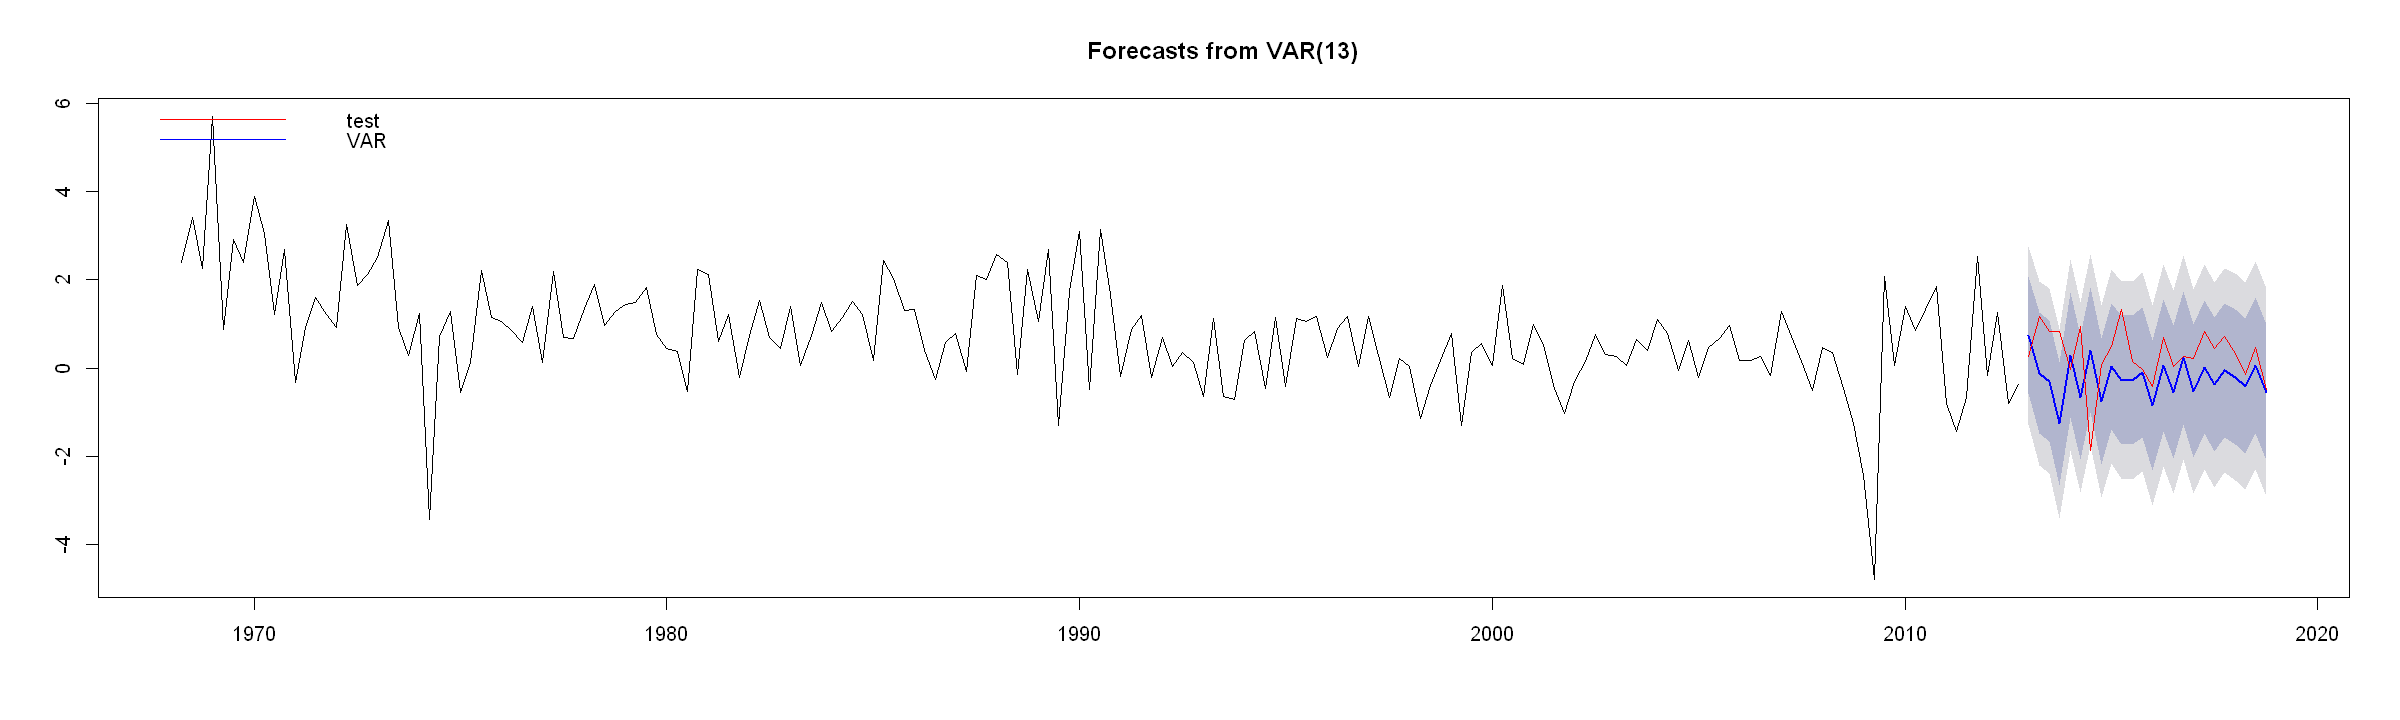

In [22]:
plot(fc3$forecast$gdpts)
lines(test[,2], col="red" )
legend("topleft",lty=1,bty = "n",col=c("red","blue"),c("test","VAR")) 

In [25]:
accuracy(fc3, test, d=0, D=0)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
untsdiff Training set,0.004658833,0.2952288,0.2222567,NaN,Inf,0.7399845,-0.006051522,NA
untsdiff Test set,-0.152960935,0.4463404,0.3824759,108.234032,145.2030,1.2734203,-0.609893306,1.309137
gdpts Training set,0.022520156,0.9459555,0.7246571,3.490133,180.4675,0.6492273,-0.014303457,NA
gdpts Test set,0.520482790,0.9799487,0.7791776,222.217277,275.6300,0.6980727,-0.338075071,1.490908


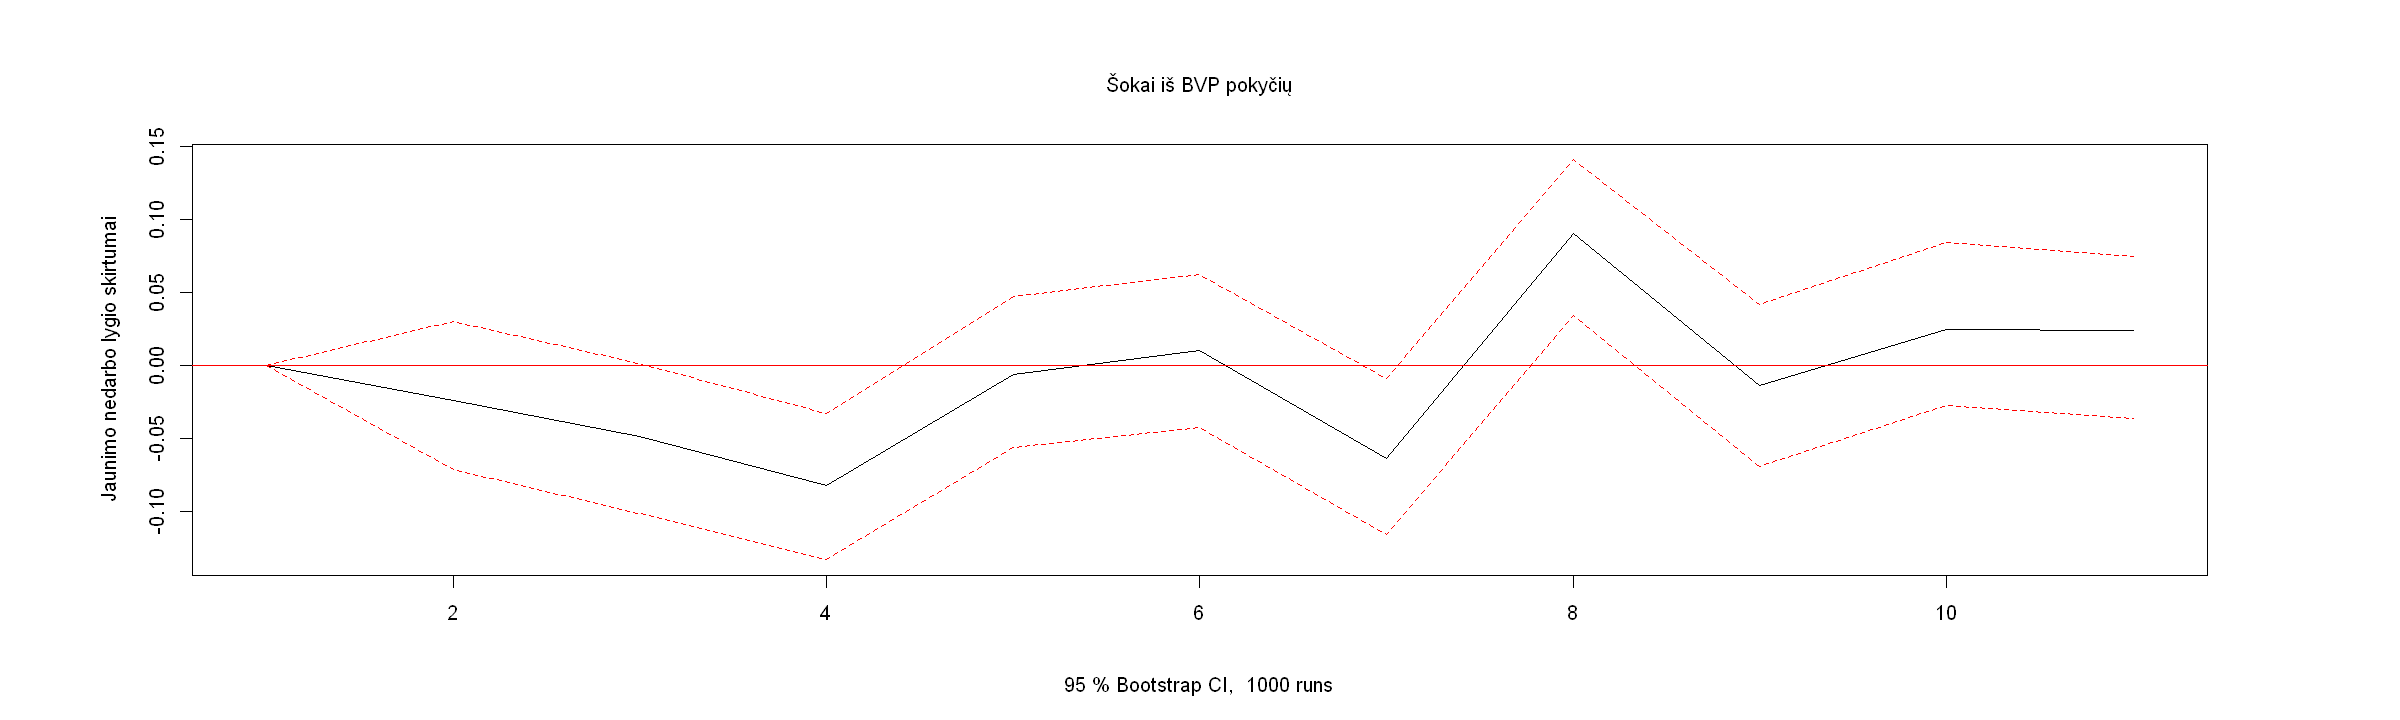

In [26]:
feir <- irf(var.2c, impulse = "gdpts", response = "untsdiff",
             n.ahead = 10, ortho = FALSE, runs = 1000)

plot(feir, main="Šokai iš BVP pokyčių", ylab="Jaunimo nedarbo lygio skirtumai", xlab=" ")

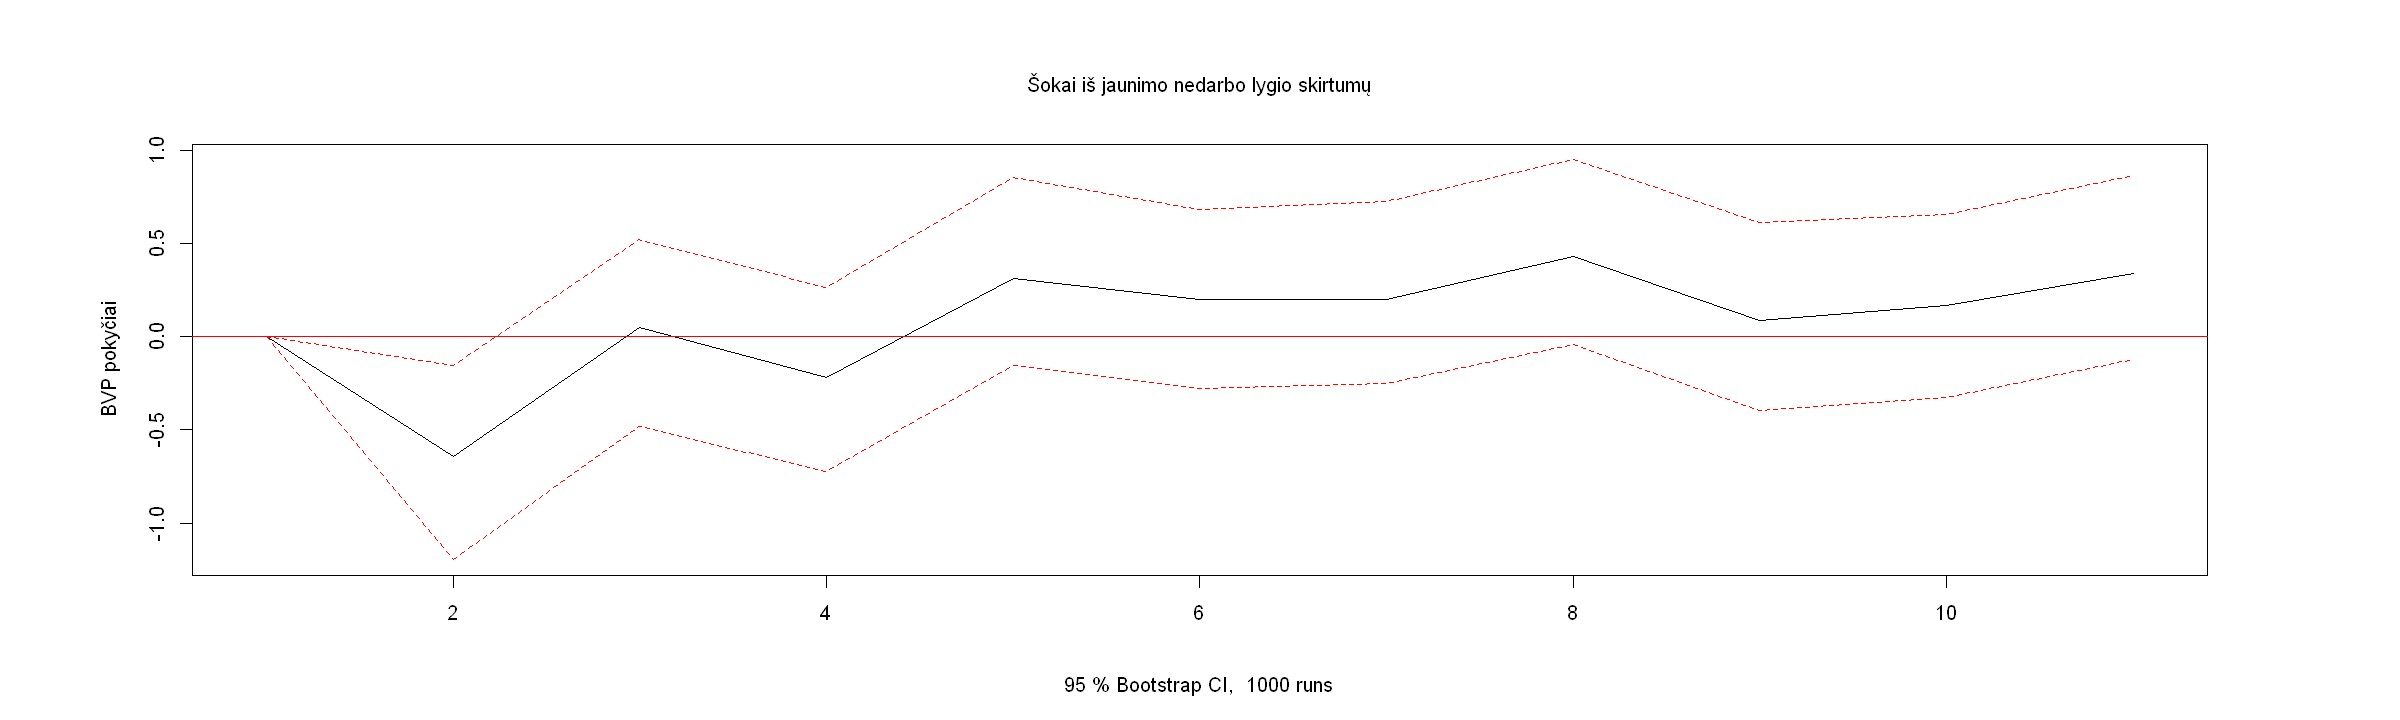

In [27]:
feir1 <- irf(var.2c, impulse = "untsdiff", response = "gdpts",
             n.ahead = 10, ortho = FALSE, runs = 1000)

plot(feir1,main="Šokai iš jaunimo nedarbo lygio skirtumų", ylab="BVP pokyčiai", xlab=" ")

In [29]:
library(TSA)

In [42]:
var.2c$varresult$untsdiff


Call:
lm(formula = y ~ -1 + ., data = datamat)

Coefficients:
 untsdiff.l1      gdpts.l1   untsdiff.l2      gdpts.l2   untsdiff.l3  
   -0.238817     -0.024433      0.100670     -0.050950      0.145184  
    gdpts.l3   untsdiff.l4      gdpts.l4   untsdiff.l5      gdpts.l5  
   -0.081834     -0.237785      0.004263      0.117606      0.034741  
 untsdiff.l6      gdpts.l6   untsdiff.l7      gdpts.l7   untsdiff.l8  
    0.061798     -0.047740      0.152506      0.065243     -0.170663  
    gdpts.l8   untsdiff.l9      gdpts.l9  untsdiff.l10     gdpts.l10  
    0.020998      0.146957      0.032135      0.319950     -0.017439  
untsdiff.l11     gdpts.l11  untsdiff.l12     gdpts.l12  untsdiff.l13  
    0.122221     -0.014783     -0.245466      0.042218      0.090596  
   gdpts.l13  
    0.030885  


____

Sezoniniams skirtumam

In [33]:
untsdiff2 <- diff(unts, d = 1, lag = 4)

In [34]:
df2<- cbind(untsdiff2, gdpts)

In [35]:
train1 <- window(df2, start =c(1969,1),end=c(2012,4))
test1 <-window(df2, start=c(2013,1))

In [36]:
nrow(test1)

[1] 24

In [37]:
floor(12 * (nrow(train1) / 100)^(1/4))

[1] 13

In [38]:
VARselect(train1, lag.max = 13, type = "none")

,1,2,3,4,5,6,7,8,9,10,11,12,13
AIC(n),-0.8006068,-0.9715841,-1.0003509,-1.1173309,-1.2061382,-1.1812096,-1.2597337,-1.2619268,-1.3351851,-1.3489130,-1.3731394,-1.4111167,-1.4670035
HQ(n),-0.7697840,-0.9099385,-0.9078825,-0.9940397,-1.0520243,-0.9962728,-1.0439742,-1.0153445,-1.0577800,-1.0406851,-1.0340887,-1.0412433,-1.0663072
SC(n),-0.7246865,-0.8197436,-0.7725901,-0.8136499,-0.8265370,-0.7256881,-0.7282920,-0.6545648,-0.6519029,-0.5897105,-0.5380166,-0.5000737,-0.4800403
FPE(n),0.4490575,0.3784905,0.3677749,0.3272035,0.2994435,0.3070711,0.2839704,0.2834673,0.2635858,0.2601680,0.2541515,0.2449247,0.2318863


In [39]:
var.3c <- vars::VAR(train1, p = 13, type="none" )

In [40]:
var.3c %>% forecast::forecast(h=nrow(test1)) -> fc2

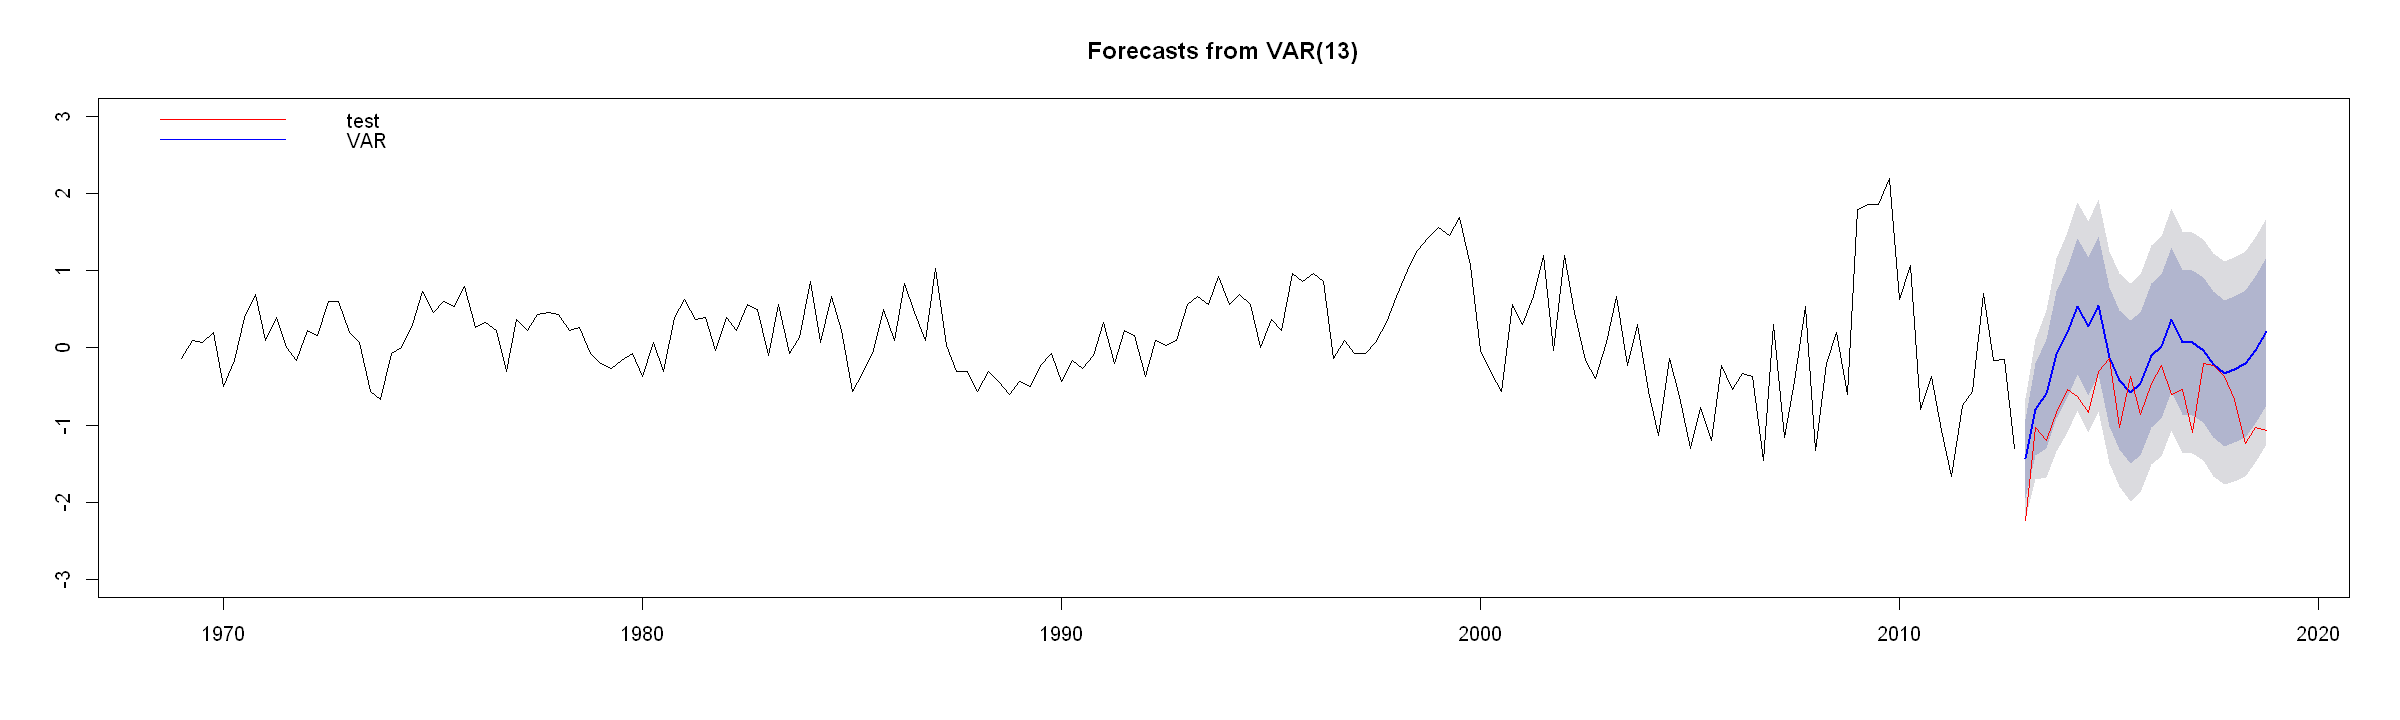

In [41]:
plot(fc2$forecast$untsdiff2,ylim=c(-3,3))
lines(test1[,1], col="red" )
legend("topleft",lty=1,bty = "n",col=c("red","blue"),c("test","VAR")) 

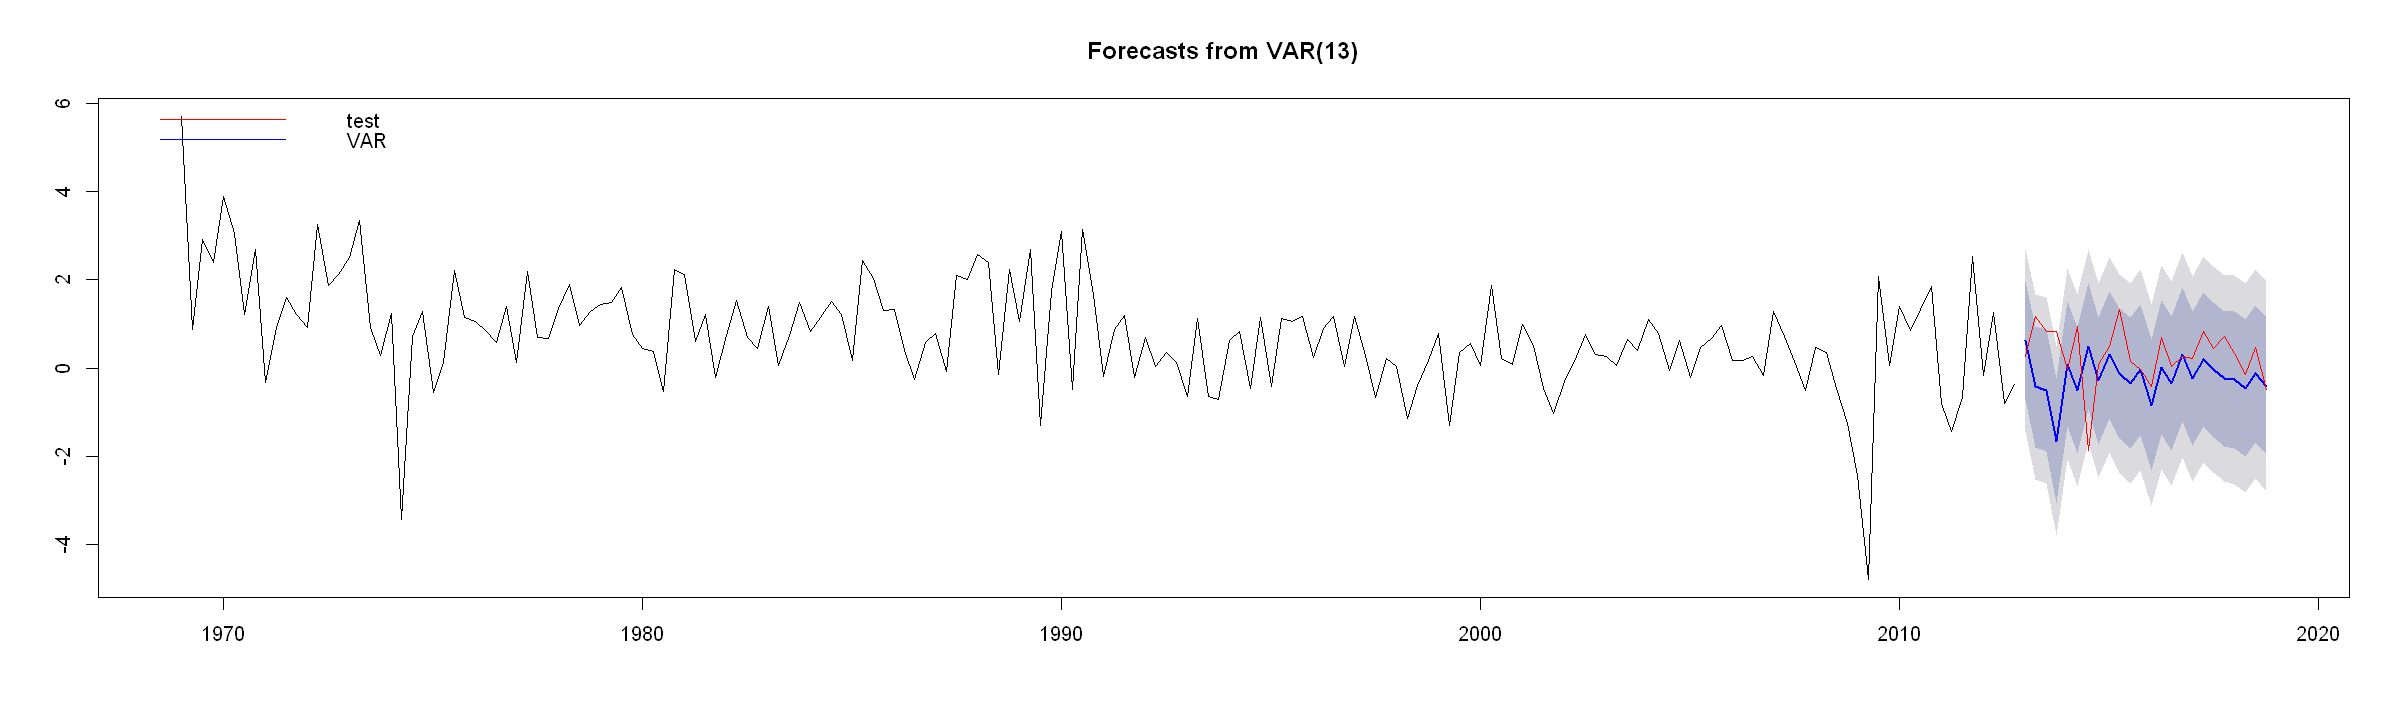

In [42]:
plot(fc2$forecast$gdpts)
lines(test1[,2], col="red")
legend("topleft",lty=1,bty = "n",col=c("red","blue"),c("test","VAR")) 

____________

In [43]:
df1 <- cbind(unts, infts)

In [44]:
train2 <- window(df1, start =c(1968,1),end=c(2012,4))
test2 <-window(df1, start=c(2013,1))

In [45]:
floor(12 * (nrow(train2) / 100)^(1/4))

[1] 13

In [46]:
VARselect(train2, lag.max = 13, type = "both")

,1,2,3,4,5,6,7,8,9,10,11,12,13
AIC(n),-1.9499525,-2.3505922,-2.32126425,-2.57975980,-2.6887218,-2.66094142,-2.64411069,-2.81496515,-2.78551432,-2.73946161,-2.76014986,-2.77671214,-2.77427866
HQ(n),-1.8893285,-2.2596562,-2.20001634,-2.42819991,-2.5068499,-2.44875758,-2.40161488,-2.54215735,-2.48239454,-2.40602986,-2.39640613,-2.38265643,-2.34991098
SC(n),-1.8005875,-2.1265447,-2.02253431,-2.20634737,-2.2406268,-2.13816401,-2.04665080,-2.14282277,-2.03868945,-1.91795426,-1.86396002,-1.80583981,-1.72872385
FPE(n),0.1422834,0.0953186,0.09816383,0.07581395,0.0680015,0.06993755,0.07115237,0.06000761,0.06184004,0.06480444,0.06353638,0.06256145,0.06279461


In [47]:
var.4c <- vars::VAR(train2, p = 8, type = "both")

In [48]:
H1 <- ca.jo(train2, ecdet="none", K = 8)

In [49]:
summary(H1)


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , with linear trend 

Eigenvalues (lambda):
[1] 0.04286273 0.01441296

Values of teststatistic and critical values of test:

         test 10pct  5pct  1pct
r <= 1 | 2.50  6.50  8.18 11.65
r = 0  | 7.54 12.91 14.90 19.19

Eigenvectors, normalised to first column:
(These are the cointegration relations)

          unts.l8  infts.l8
unts.l8  1.000000  1.000000
infts.l8 2.441865 -3.951512

Weights W:
(This is the loading matrix)

            unts.l8     infts.l8
unts.d  -0.02097365 -0.006307714
infts.d -0.06800287  0.005871507


In [50]:
df5 <- cbind(untsdiff2, sdiff)

In [51]:
train3 <- window(df5, start =c(1969,1),end=c(2012,4))
test3 <-window(df5, start=c(2013,1))

In [52]:
var.4c <- vars::VAR(train3, p = 5, type="const" )

In [62]:
var.4c %>% forecast::forecast(h=nrow(test3)) -> fc4

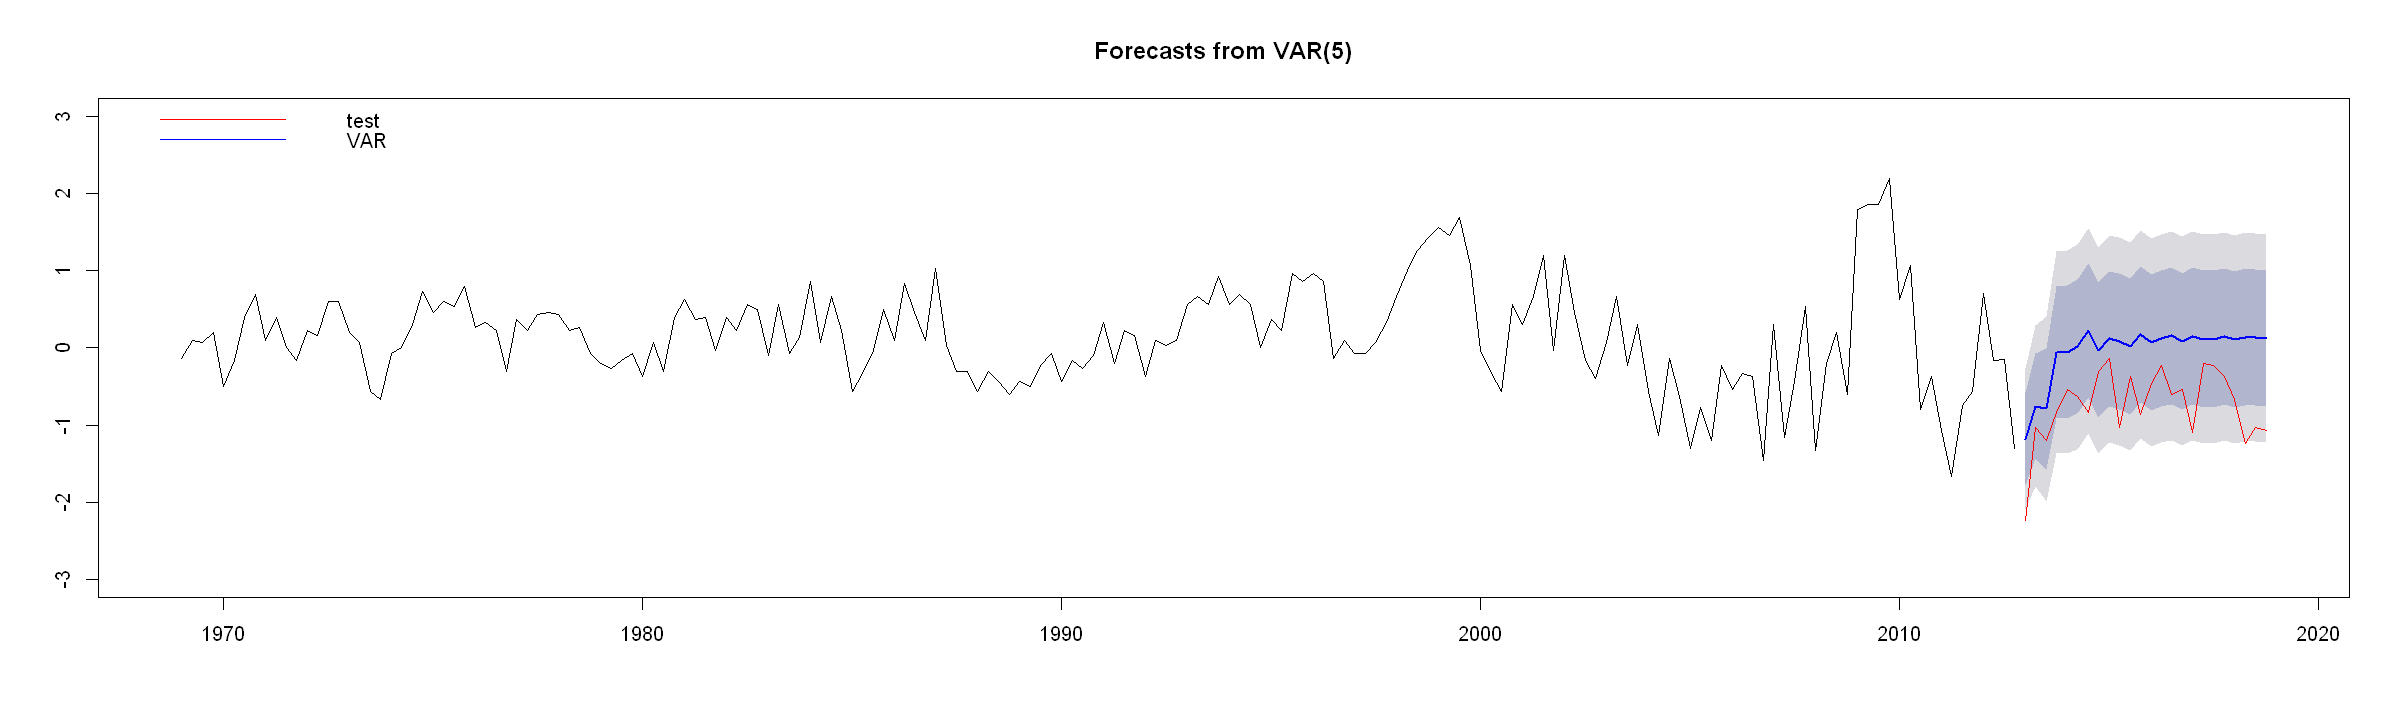

In [63]:
plot(fc4$forecast$untsdiff2, ylim=c(-3,3))
lines(test3[,1], col="red")
legend("topleft",lty=1,bty = "n",col=c("red","blue"),c("test","VAR")) 

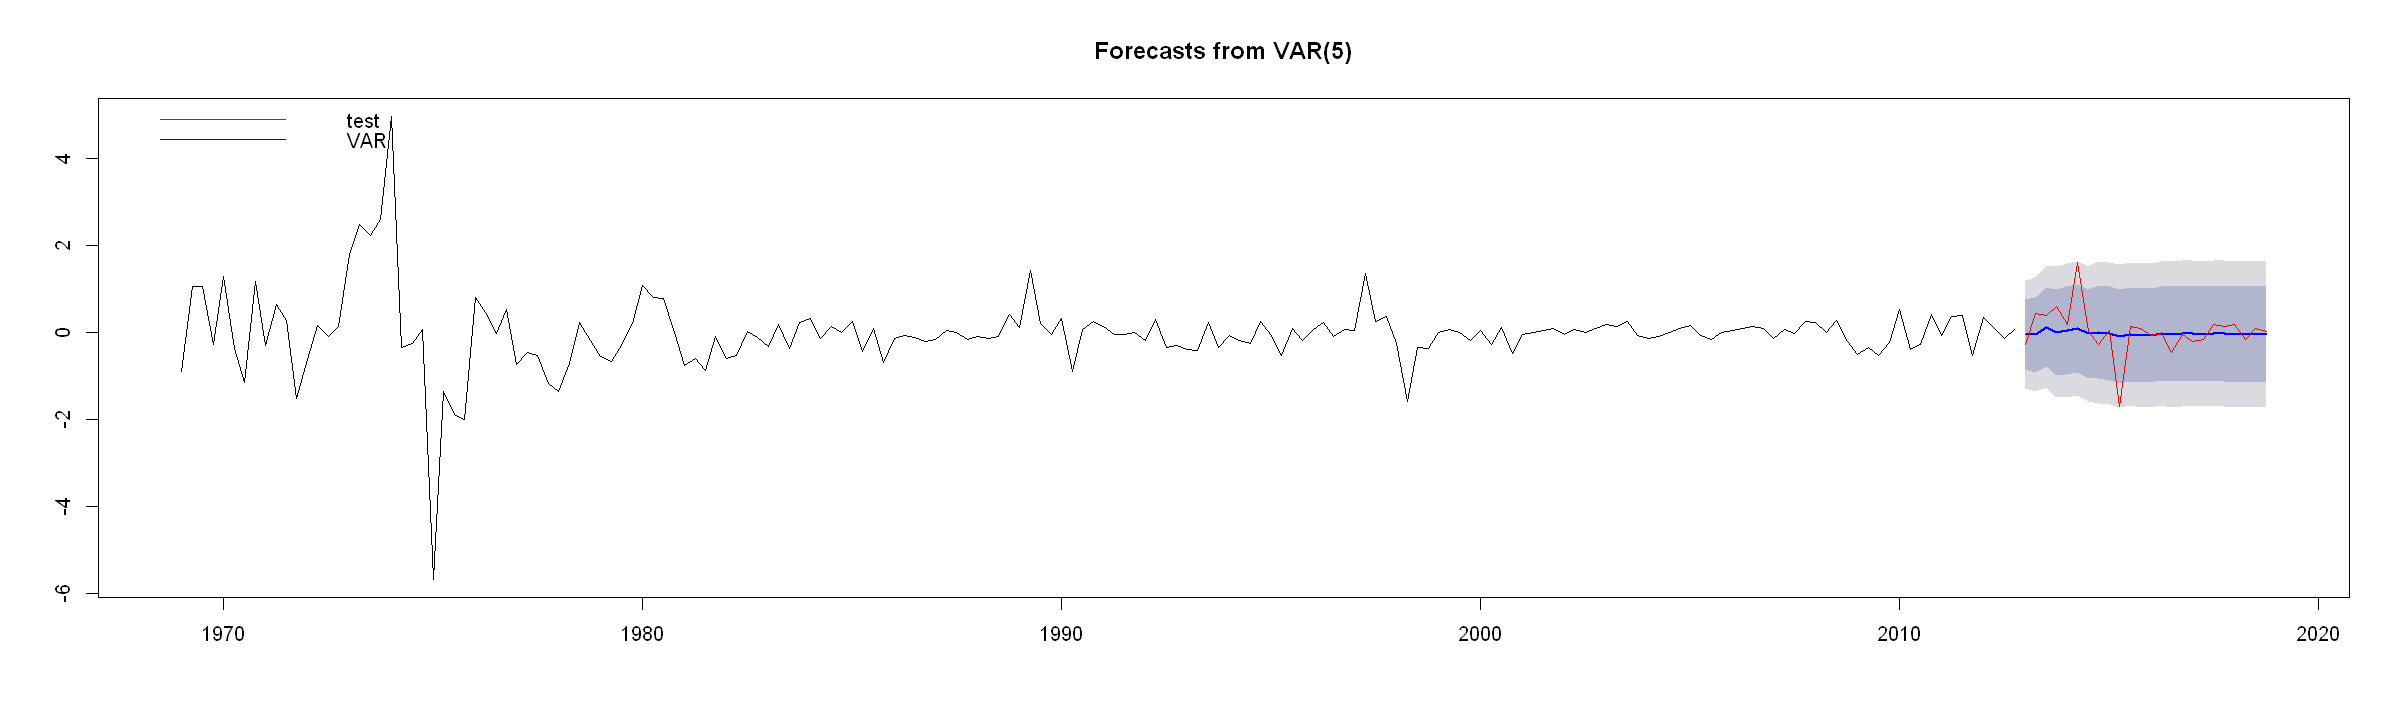

In [64]:
plot(fc3$forecast$sdiff)
lines(test3[,2], col="red")
legend("topleft",lty=1,bty = "n",col=c("red","blue"),c("test","VAR")) 

In [65]:
summary(var.4c)


VAR Estimation Results:
Endogenous variables: untsdiff2, sdiff 
Deterministic variables: const 
Sample size: 171 
Log Likelihood: -265.861 
Roots of the characteristic polynomial:
0.8769 0.8769 0.8701 0.8701 0.8628 0.8628 0.7344 0.7104 0.7104 0.05772
Call:
vars::VAR(y = train3, p = 5, type = "const")


Estimation results for equation untsdiff2: 
untsdiff2 = untsdiff2.l1 + sdiff.l1 + untsdiff2.l2 + sdiff.l2 + untsdiff2.l3 + sdiff.l3 + untsdiff2.l4 + sdiff.l4 + untsdiff2.l5 + sdiff.l5 + const 

             Estimate Std. Error t value Pr(>|t|)    
untsdiff2.l1  0.53117    0.07808   6.803 1.94e-10 ***
sdiff.l1     -0.08926    0.05845  -1.527 0.128700    
untsdiff2.l2  0.33869    0.07738   4.377 2.17e-05 ***
sdiff.l2     -0.01060    0.05236  -0.203 0.839774    
untsdiff2.l3  0.03883    0.08184   0.474 0.635801    
sdiff.l3      0.02174    0.05048   0.431 0.667273    
untsdiff2.l4 -0.51270    0.07873  -6.512 9.15e-10 ***
sdiff.l4      0.08135    0.05149   1.580 0.116069    
untsdiff2.l5  0

In [66]:
serial.test(var.4c, type = "BG")


	Breusch-Godfrey LM test

data:  Residuals of VAR object var.4c
Chi-squared = 31.119, df = 20, p-value = 0.05364

$serial

	Breusch-Godfrey LM test

data:  Residuals of VAR object var.4c
Chi-squared = 31.119, df = 20, p-value = 0.05364



In [67]:
mean(residuals(var.4c))

[1] -1.140711e-17

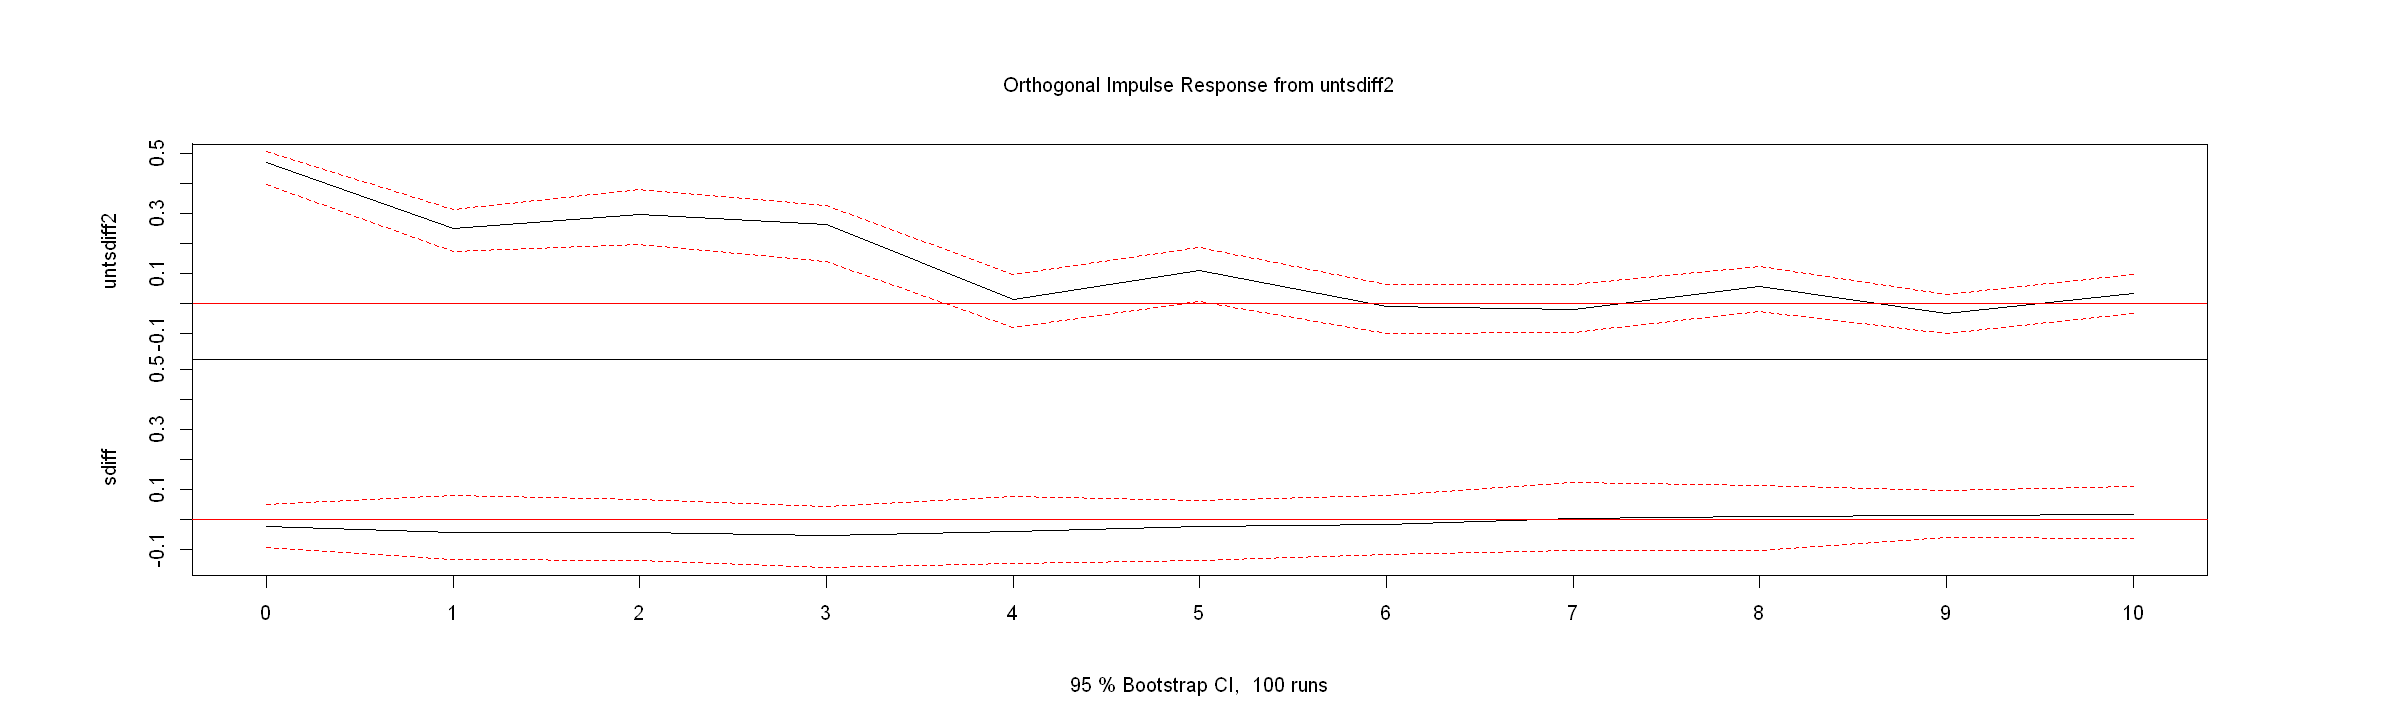

In [69]:
plot(irf(var.4c, impulse = "untsdiff2"))

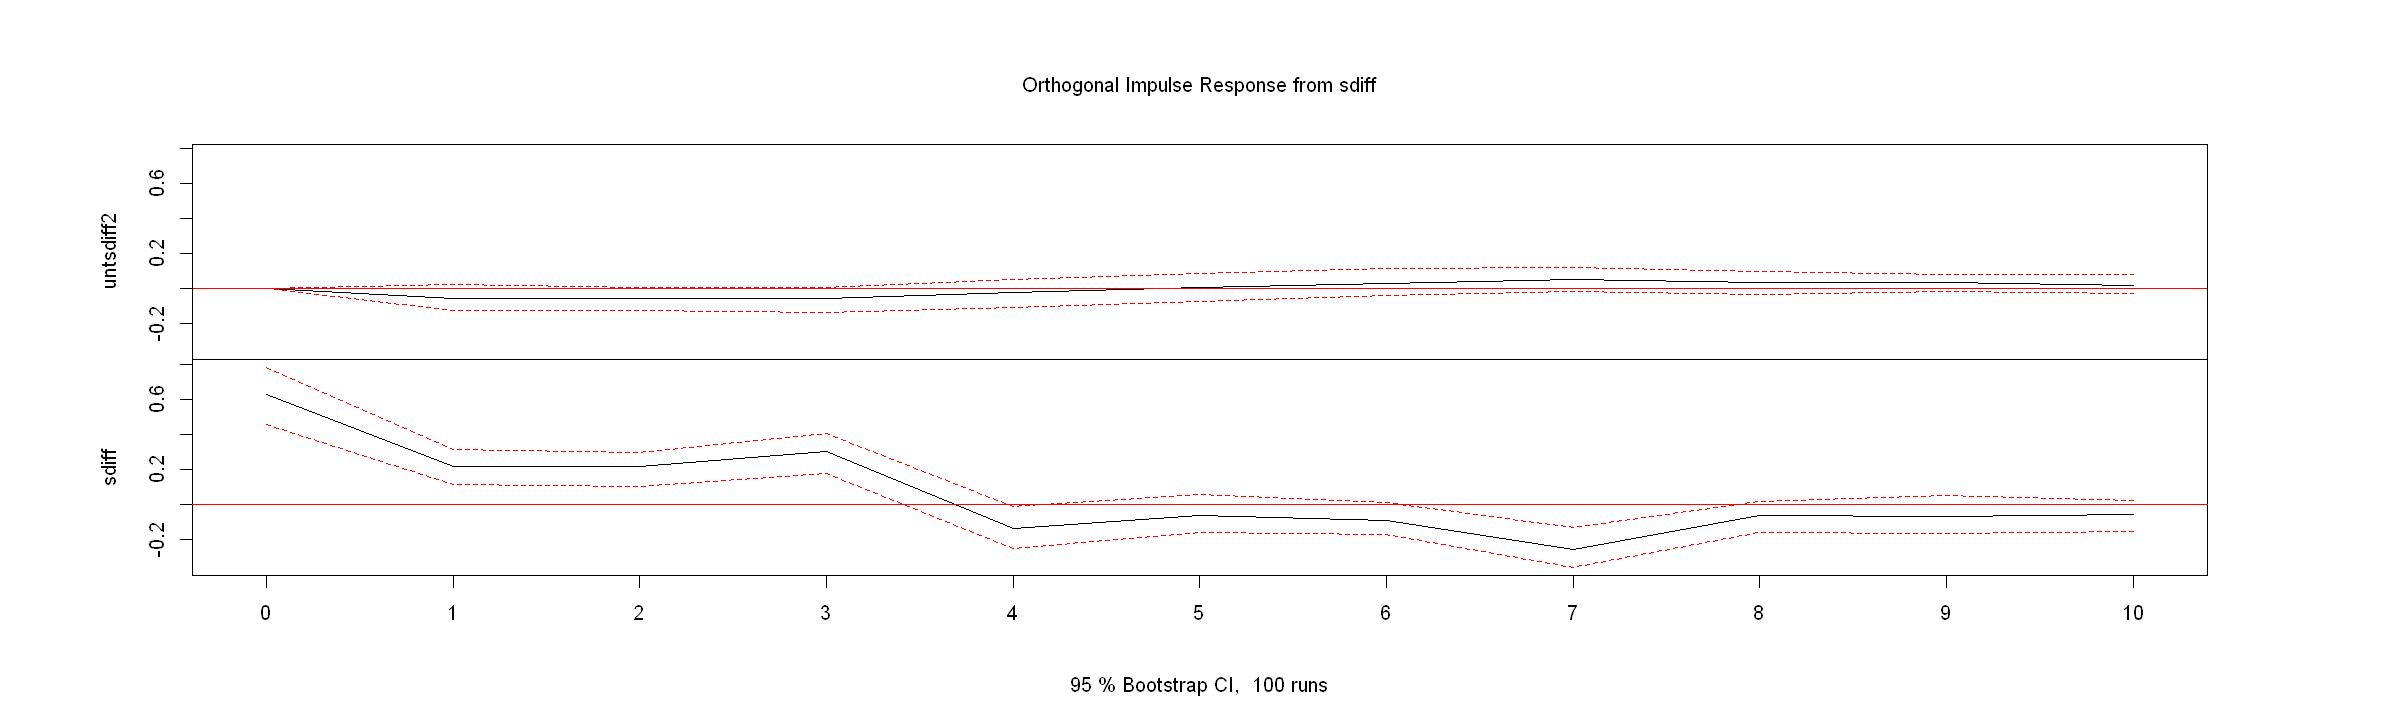

In [70]:
plot(irf(var.4c, impulse = "sdiff",boots=FALSE))

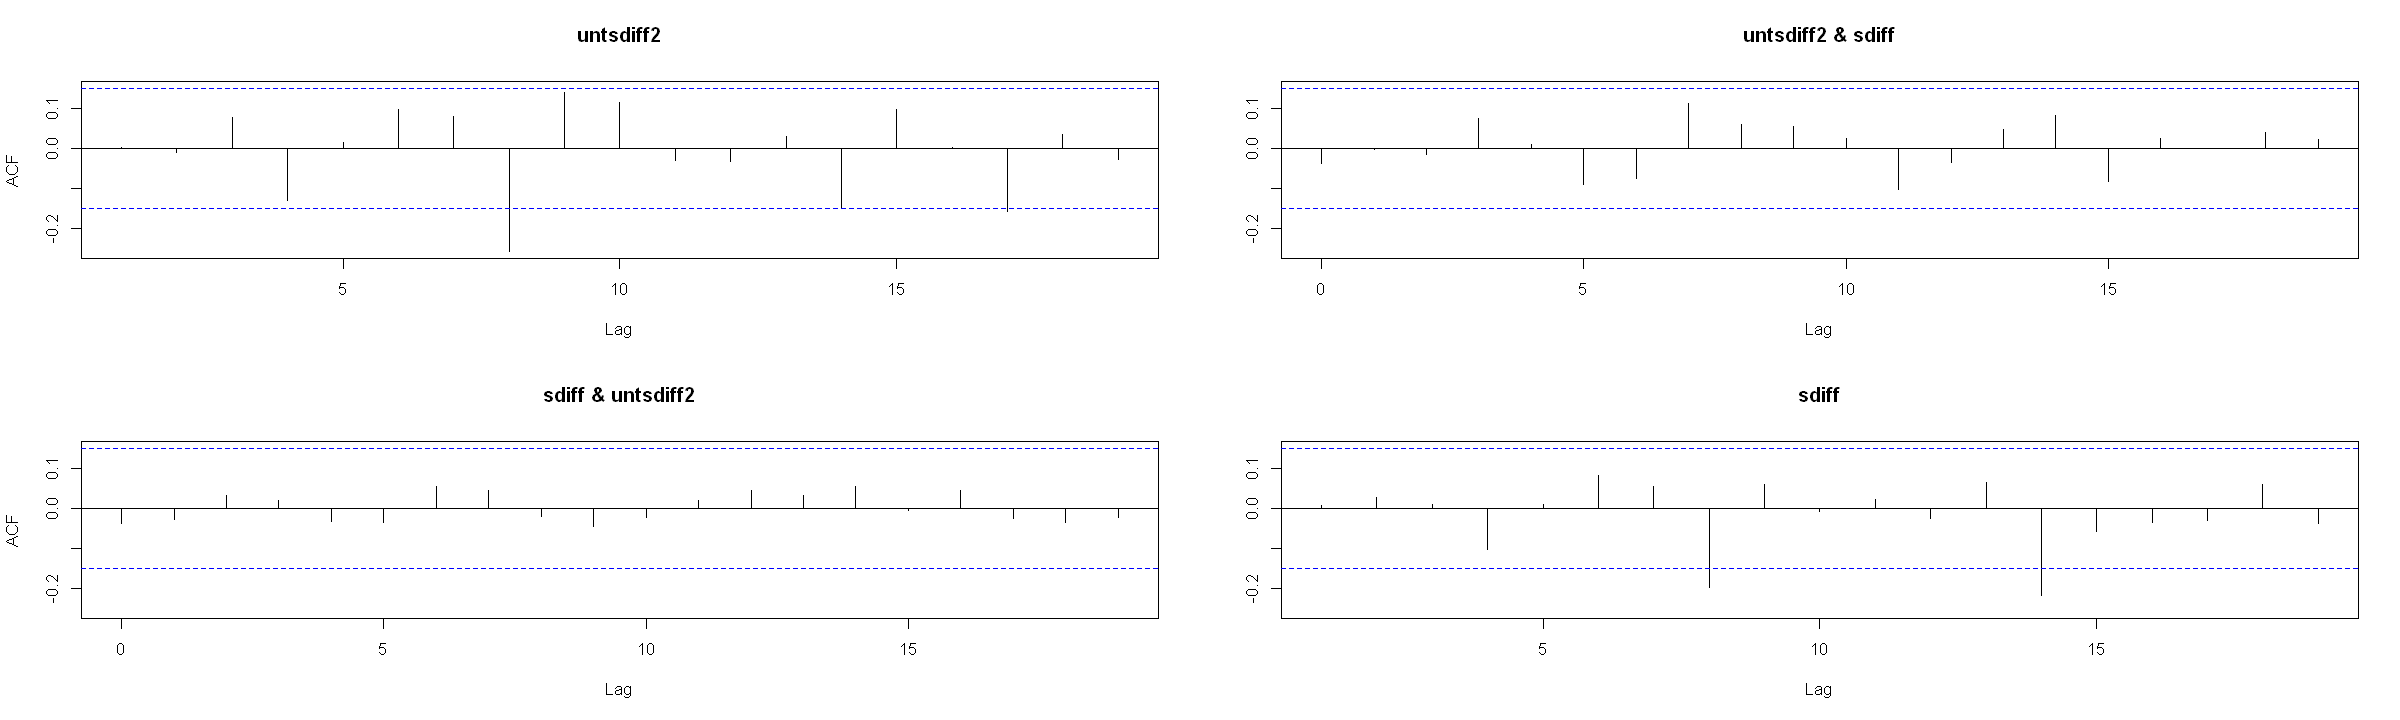

In [61]:
Acf(residuals(var.4c))

In [71]:
accuracy(fc4, test3, d=0, D=0)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
untsdiff2 Training set,1.360515e-17,0.4527395,0.3409084,NaN,Inf,0.6784275,0.002415900,NA
untsdiff2 Test set,-7.077932e-01,0.7918609,0.7077932,110.7983,110.7983,1.4085496,0.015918211,1.478028
sdiff Training set,-3.945989e-17,0.6126247,0.3943777,419.2095,672.6606,0.8769872,0.006178434,NA
sdiff Test set,5.320653e-02,0.5086928,0.3029346,112.4025,114.8173,0.6736429,0.009101901,0.933652
